In [1]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
hist_df = pd.DataFrame(history.history)
hist_df.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.555911,0.759045,0.734074,0.819231
1,0.544539,0.811907,0.459364,0.788462
2,0.410920,0.822171,0.286802,0.879231
3,0.328171,0.865024,0.300284,0.881538
4,0.300943,0.879908,0.273533,0.899231
5,0.278484,0.898127,0.242464,0.923846
6,0.263362,0.913780,0.231940,0.929231
7,0.253007,0.921735,0.224803,0.928462
8,0.241233,0.921221,0.220600,0.930000
9,0.233928,0.921735,0.213862,0.930769


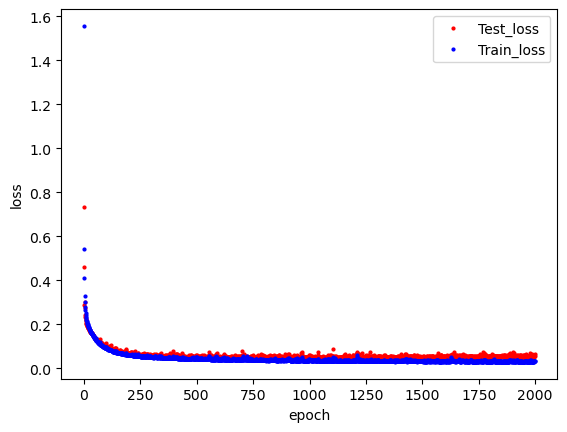

In [9]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Test_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Train_loss")
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()